In [1]:
!pip install silence_tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#import silence_tensorflow.auto
from grape import Graph, GraphVisualizer
from grape.embedders import TransEEnsmallen, FirstOrderLINEEnsmallen, DeepWalkSkipGramEnsmallen

In [3]:
version = "3.5.1"

kg = Graph.from_csv(
    node_path=f"kg_biolink_nodes_{version}.tsv",
    nodes_column="node_name",
    node_list_node_types_column="node_type",
    node_types_separator="|",
    edge_path=f"kg_biolink_edges_{version}.tsv",
    sources_column="source",
    destinations_column="destination",
    edge_list_edge_types_column="edge_type",
    name="KGBioLink",
    load_node_list_in_parallel=False,
    load_edge_list_in_parallel=False,
    directed=False
).remove_disconnected_nodes()

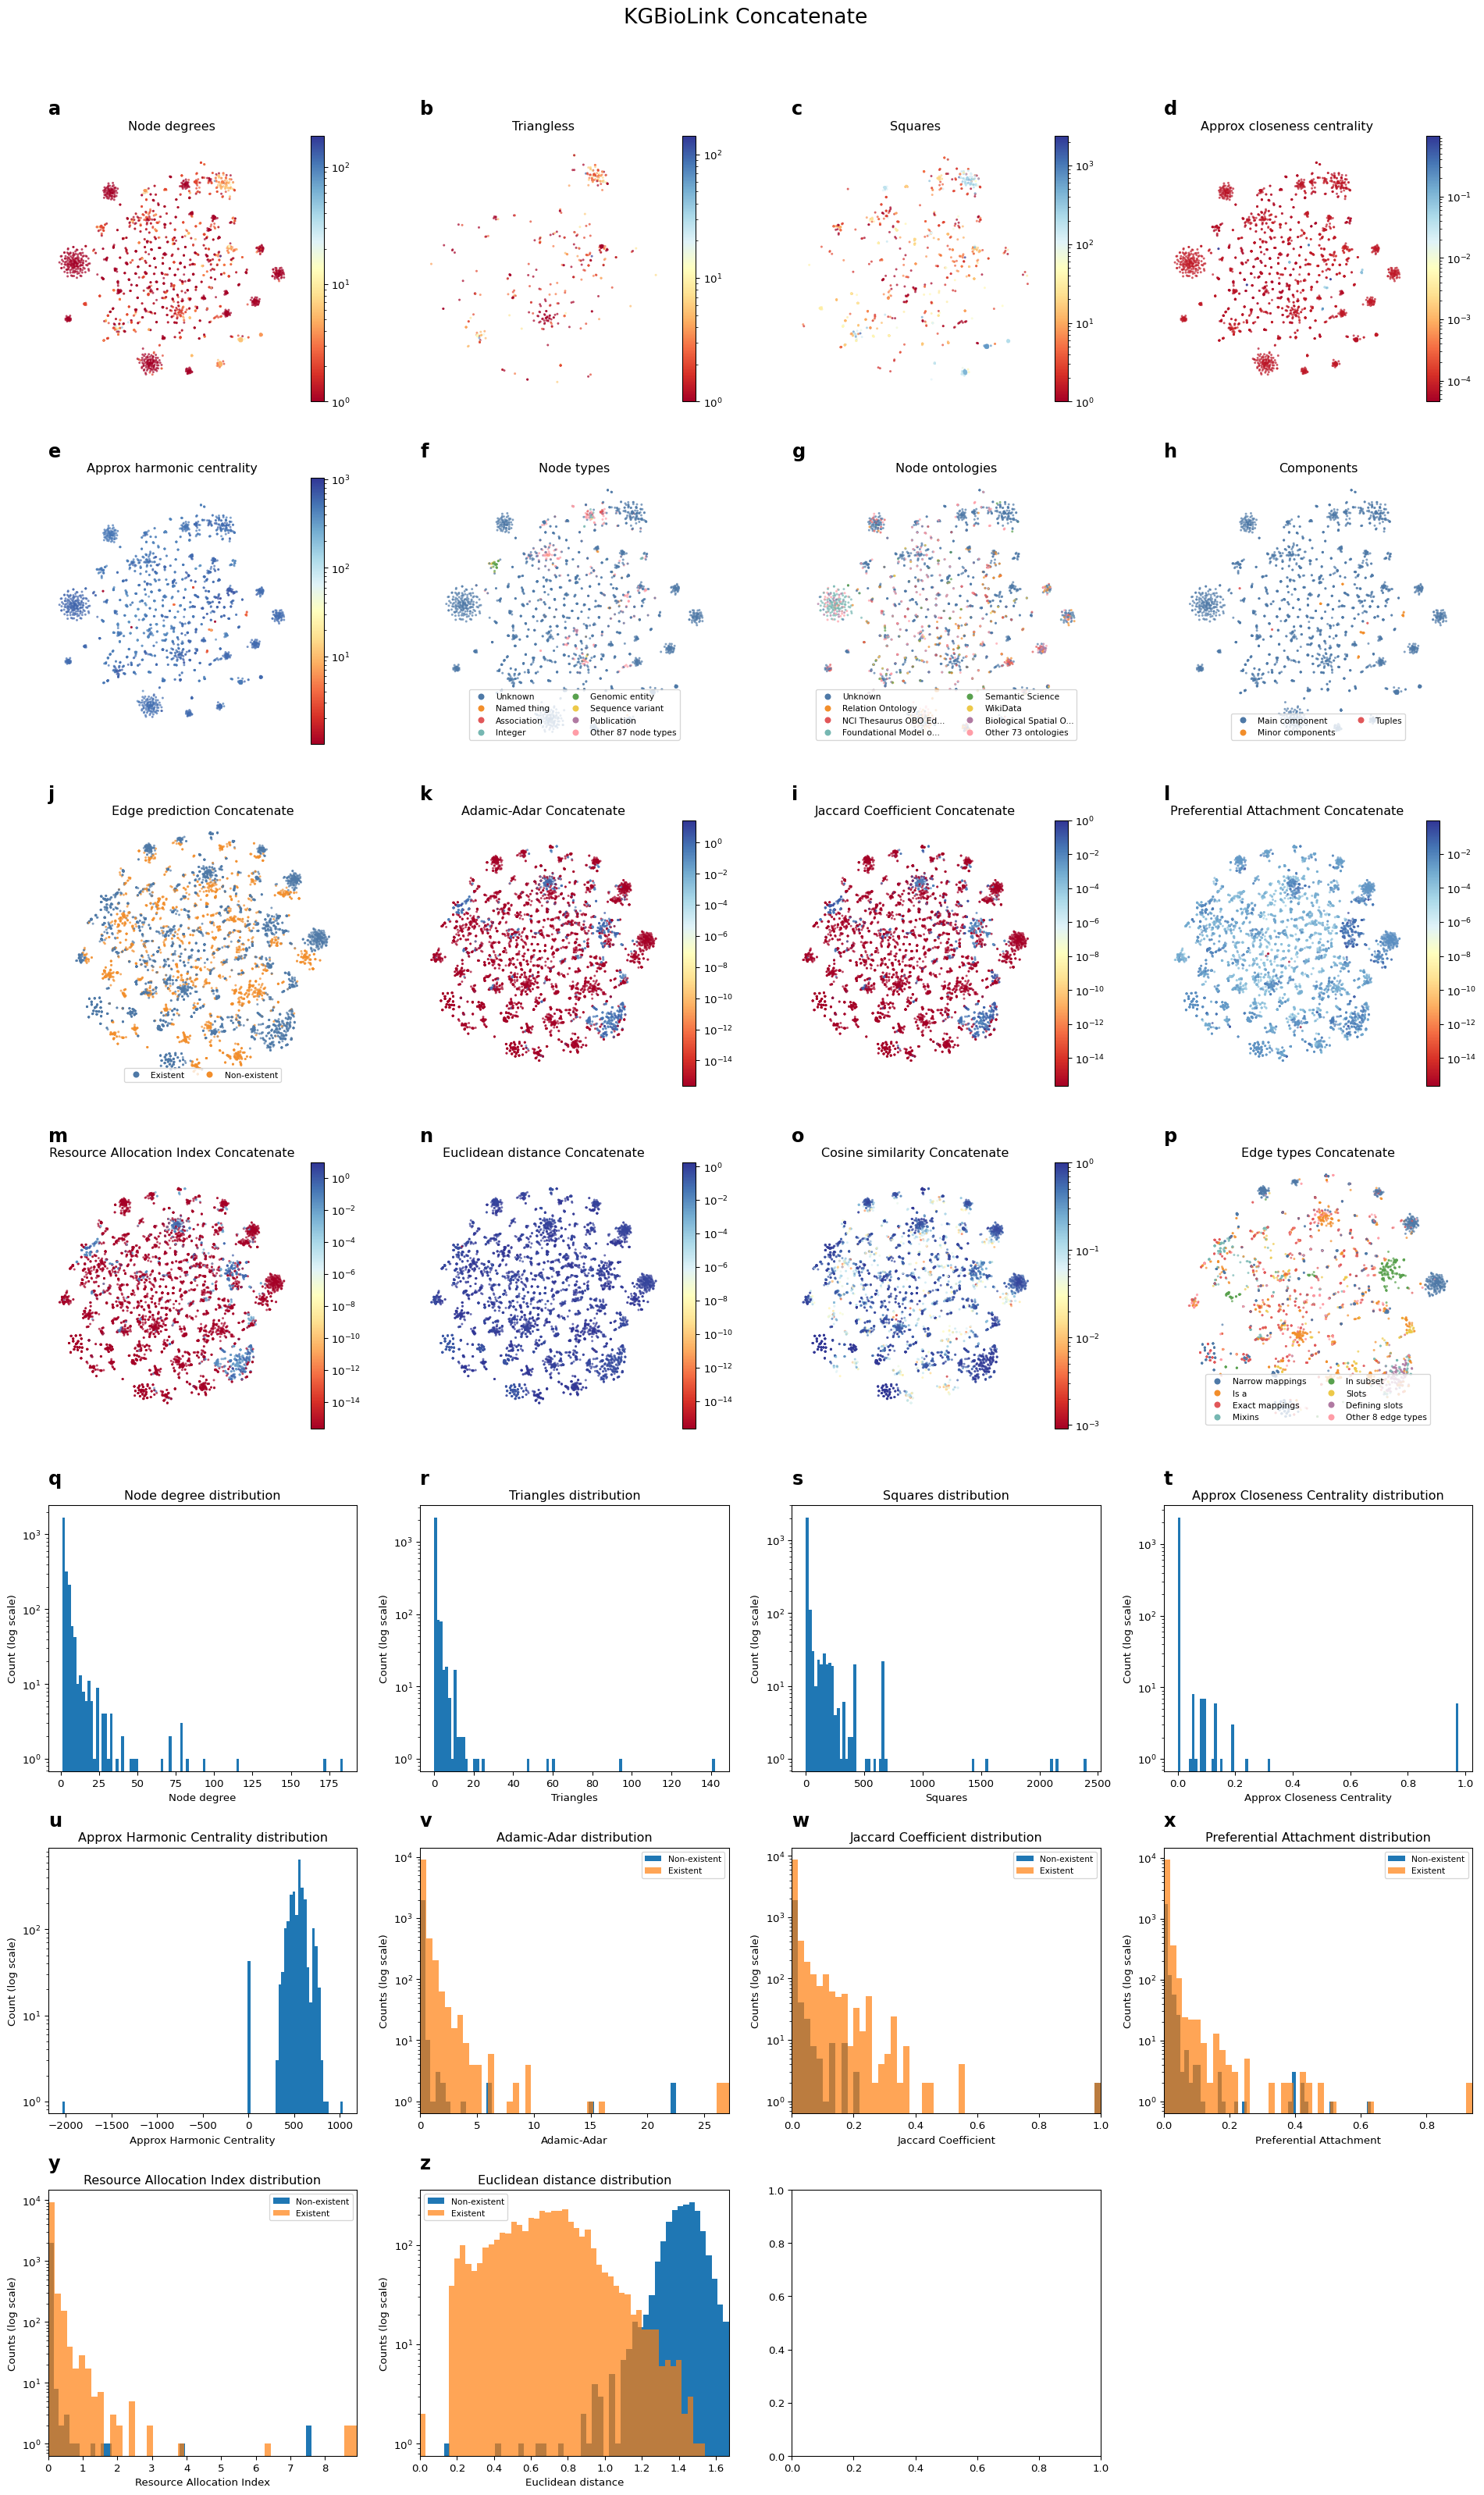

In [4]:
GraphVisualizer(kg).fit_and_plot_all("First-order LINE")

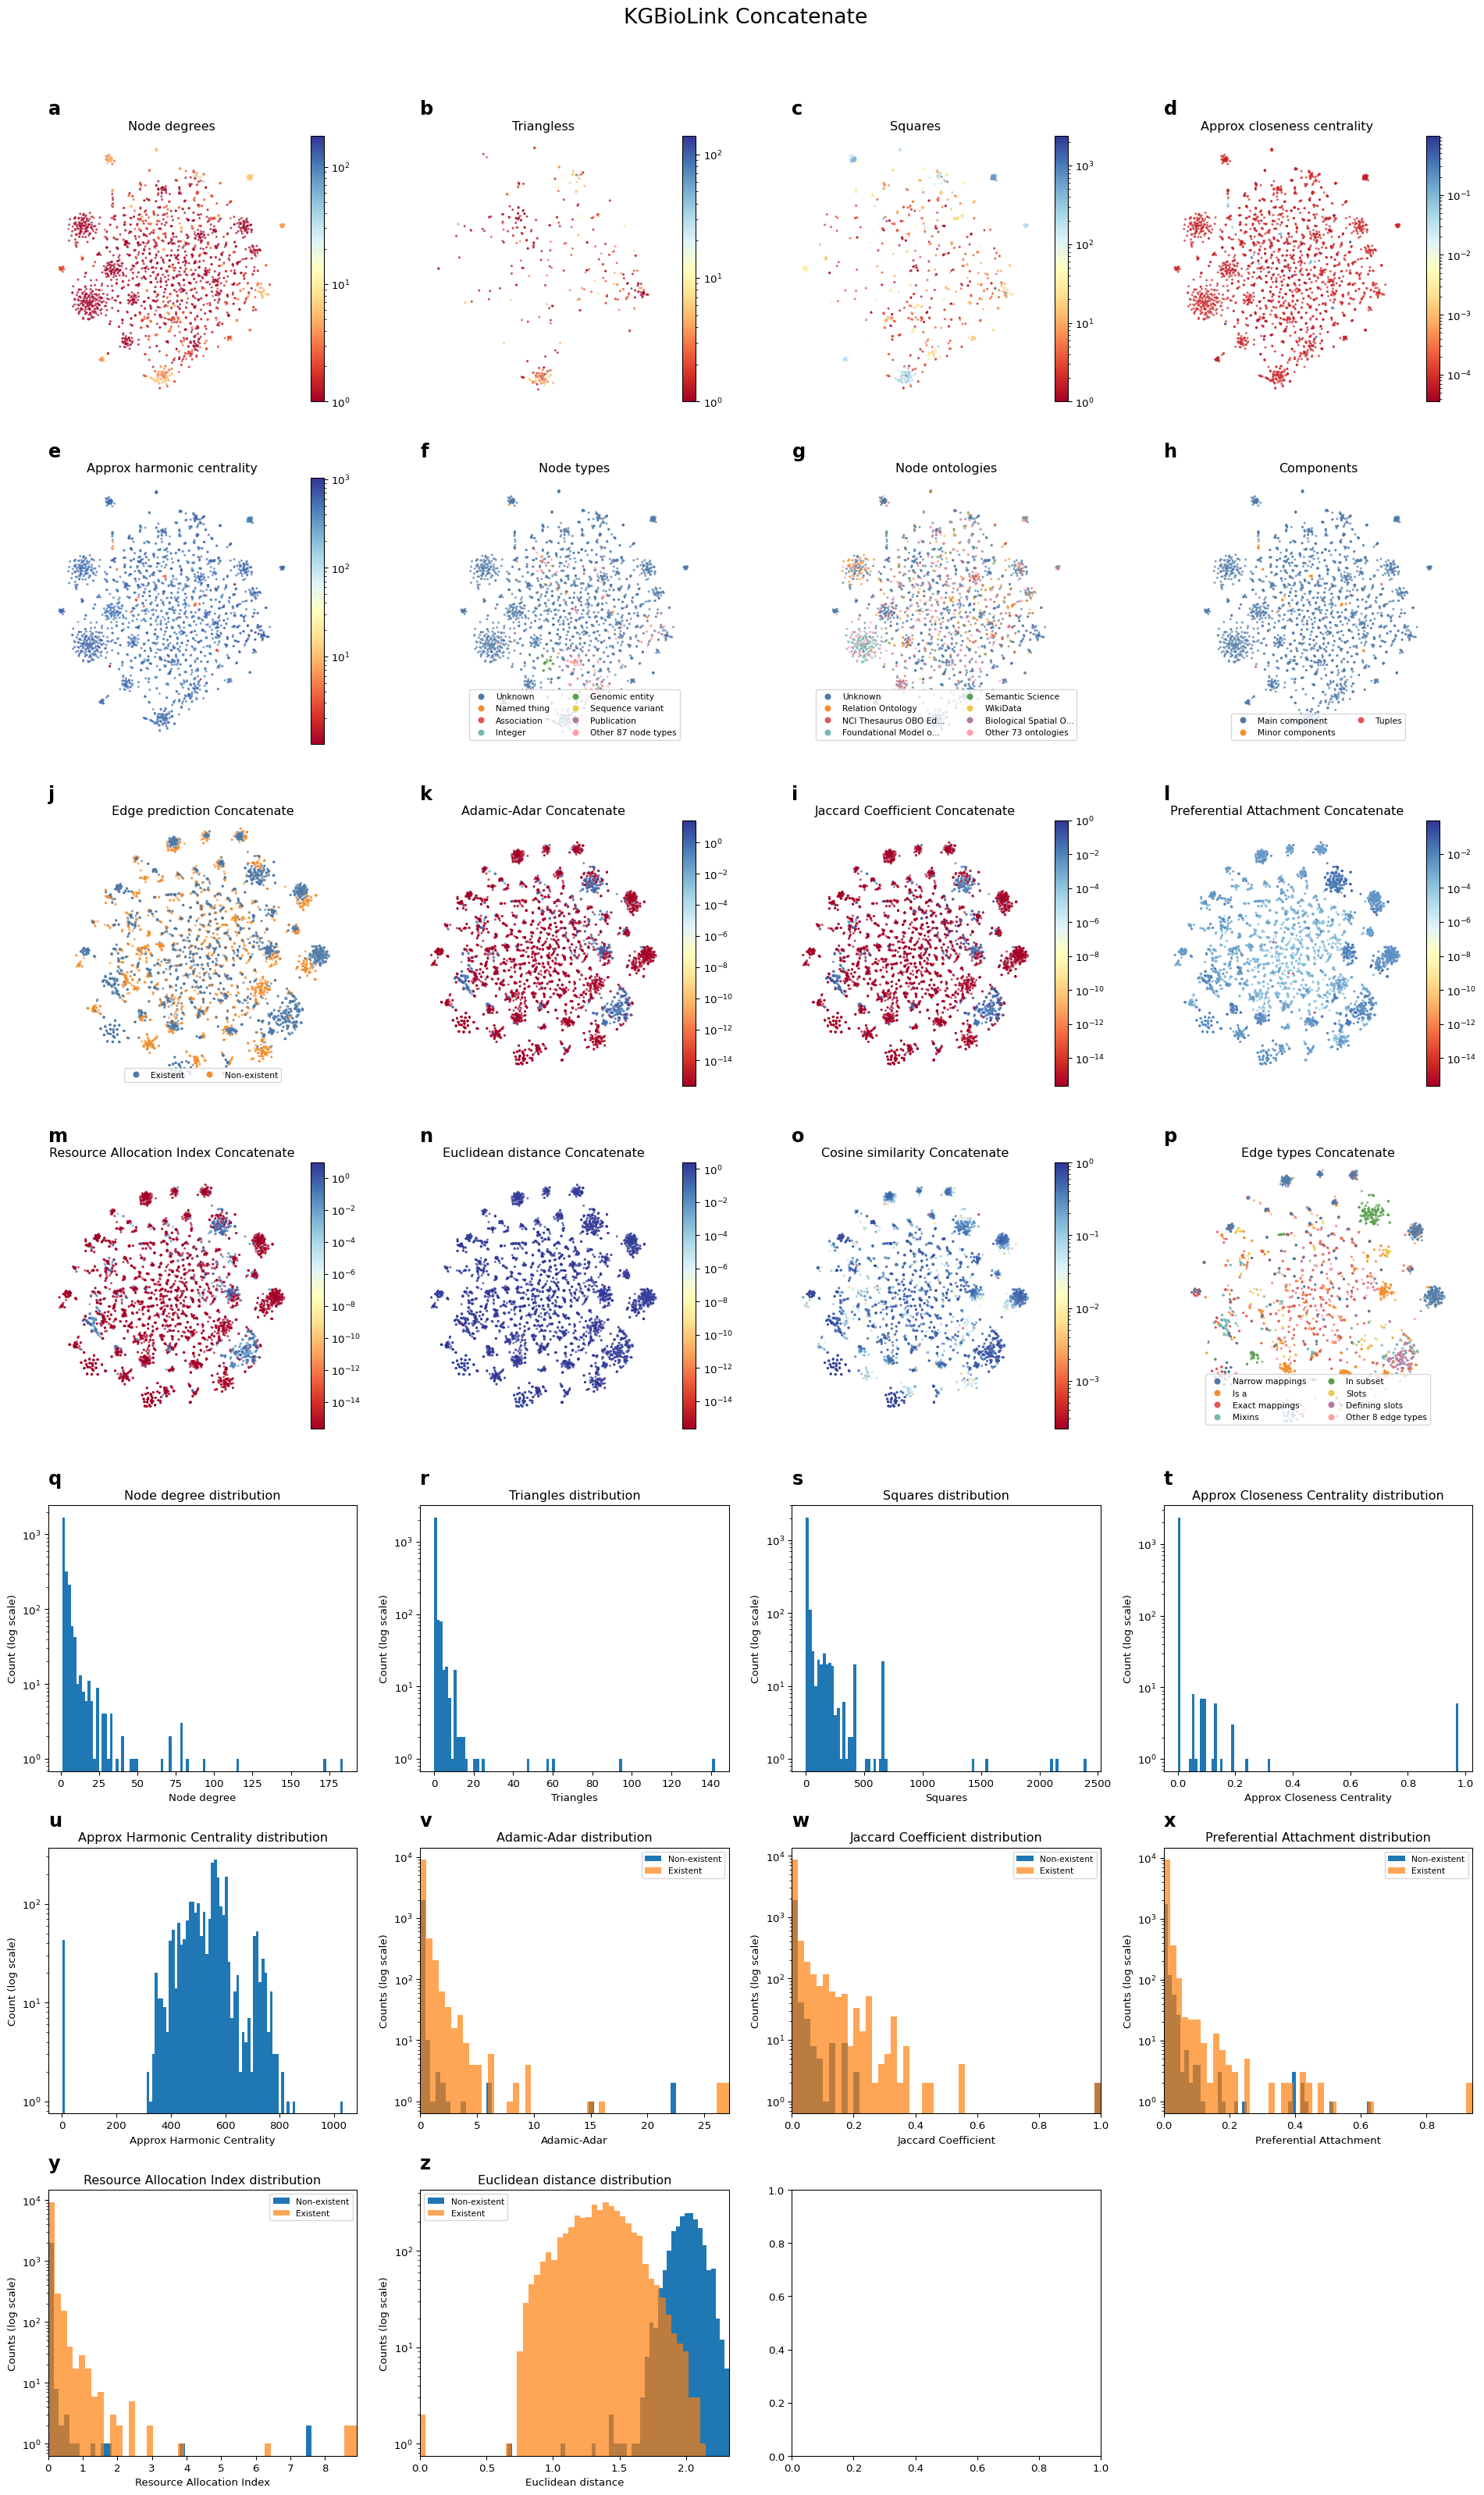

In [5]:
GraphVisualizer(kg).fit_and_plot_all("Second-order LINE")

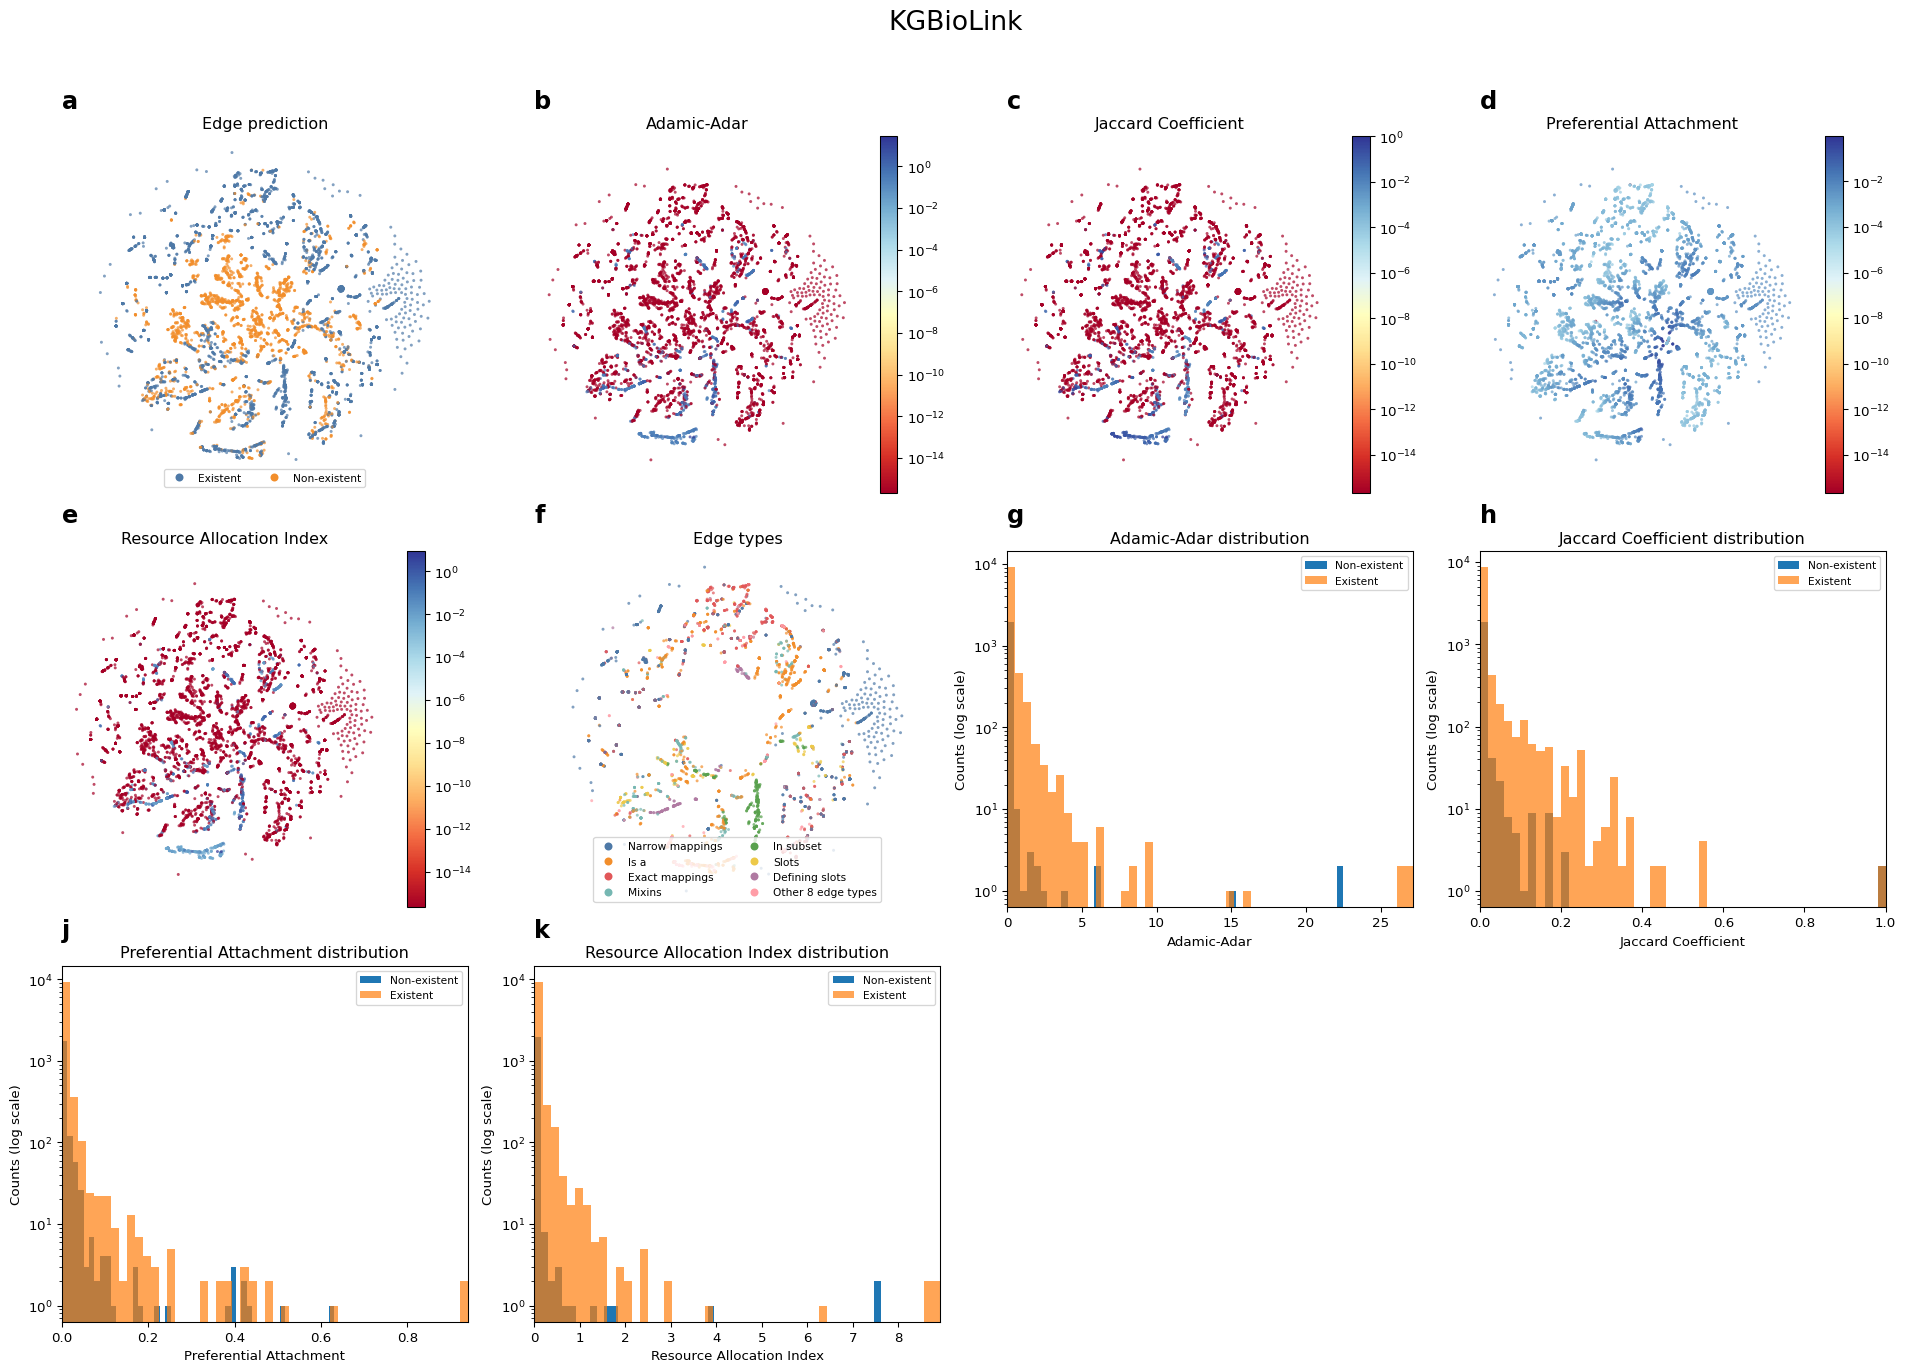

In [6]:
from grape.embedders import HyperSketching

GraphVisualizer(kg).fit_and_plot_all(edge_features=HyperSketching(number_of_hops=6))

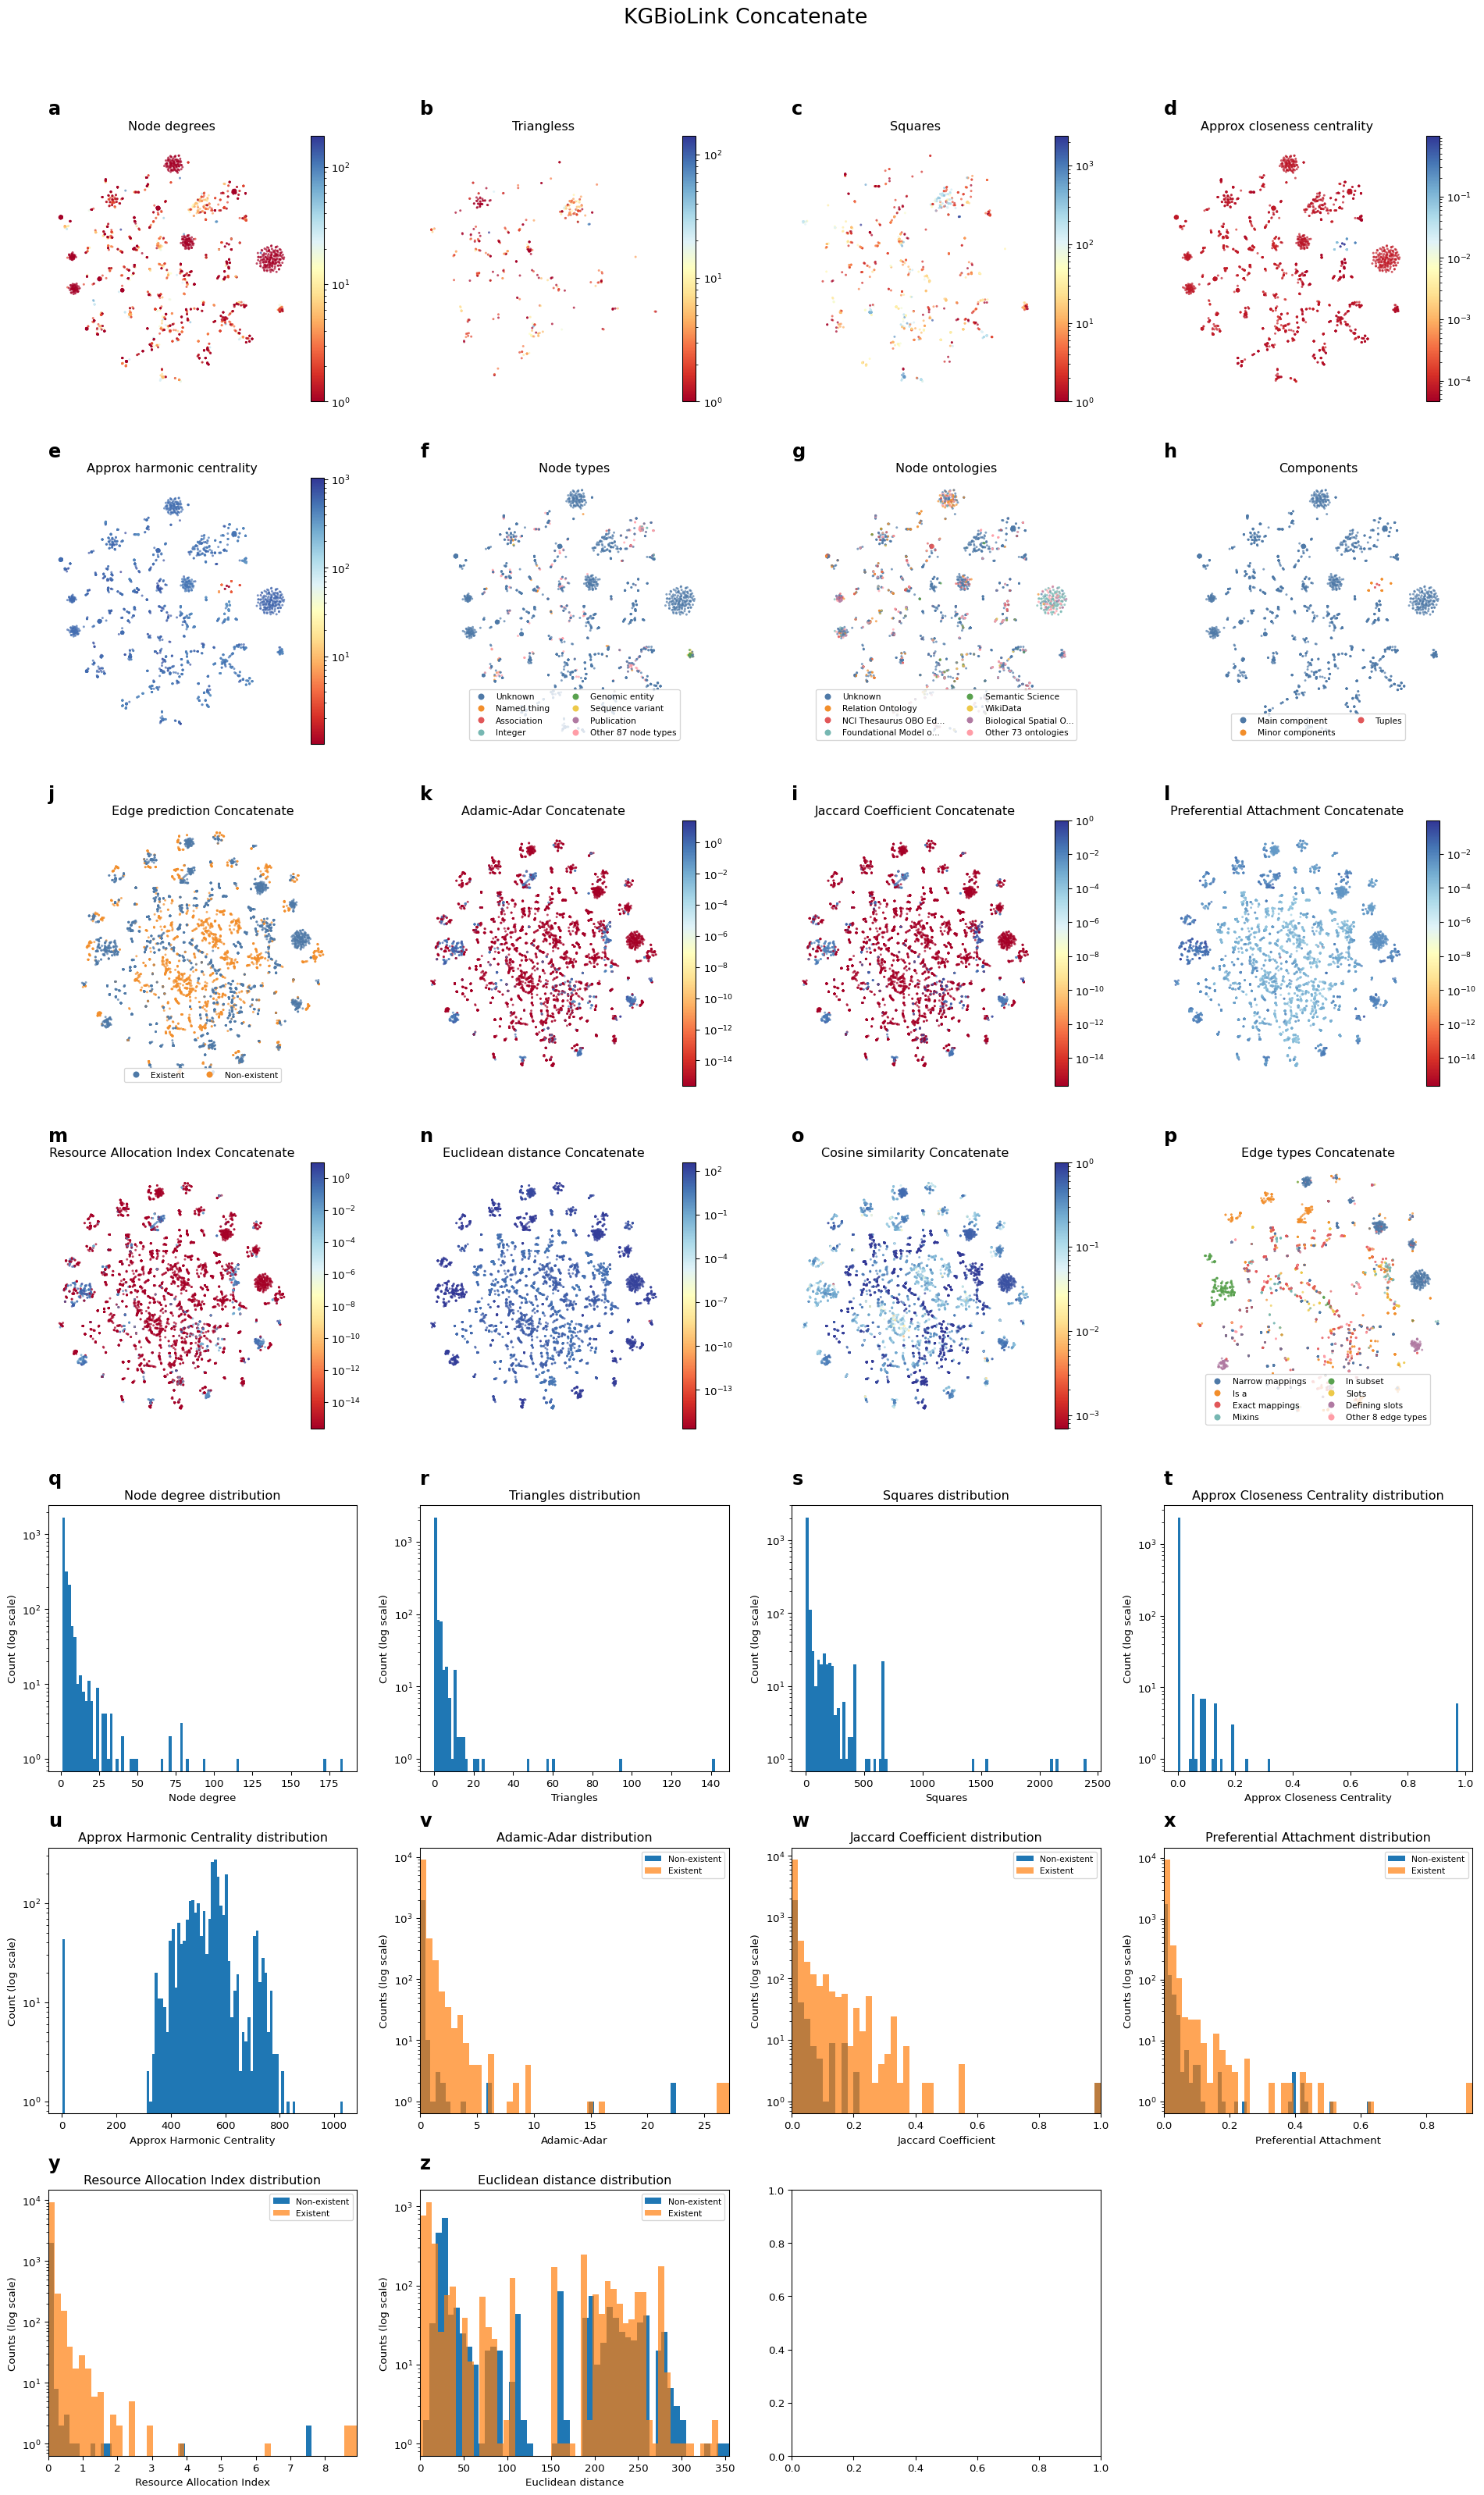

In [7]:
GraphVisualizer(kg.to_undirected()).fit_and_plot_all("DeepWalk SkipGram")

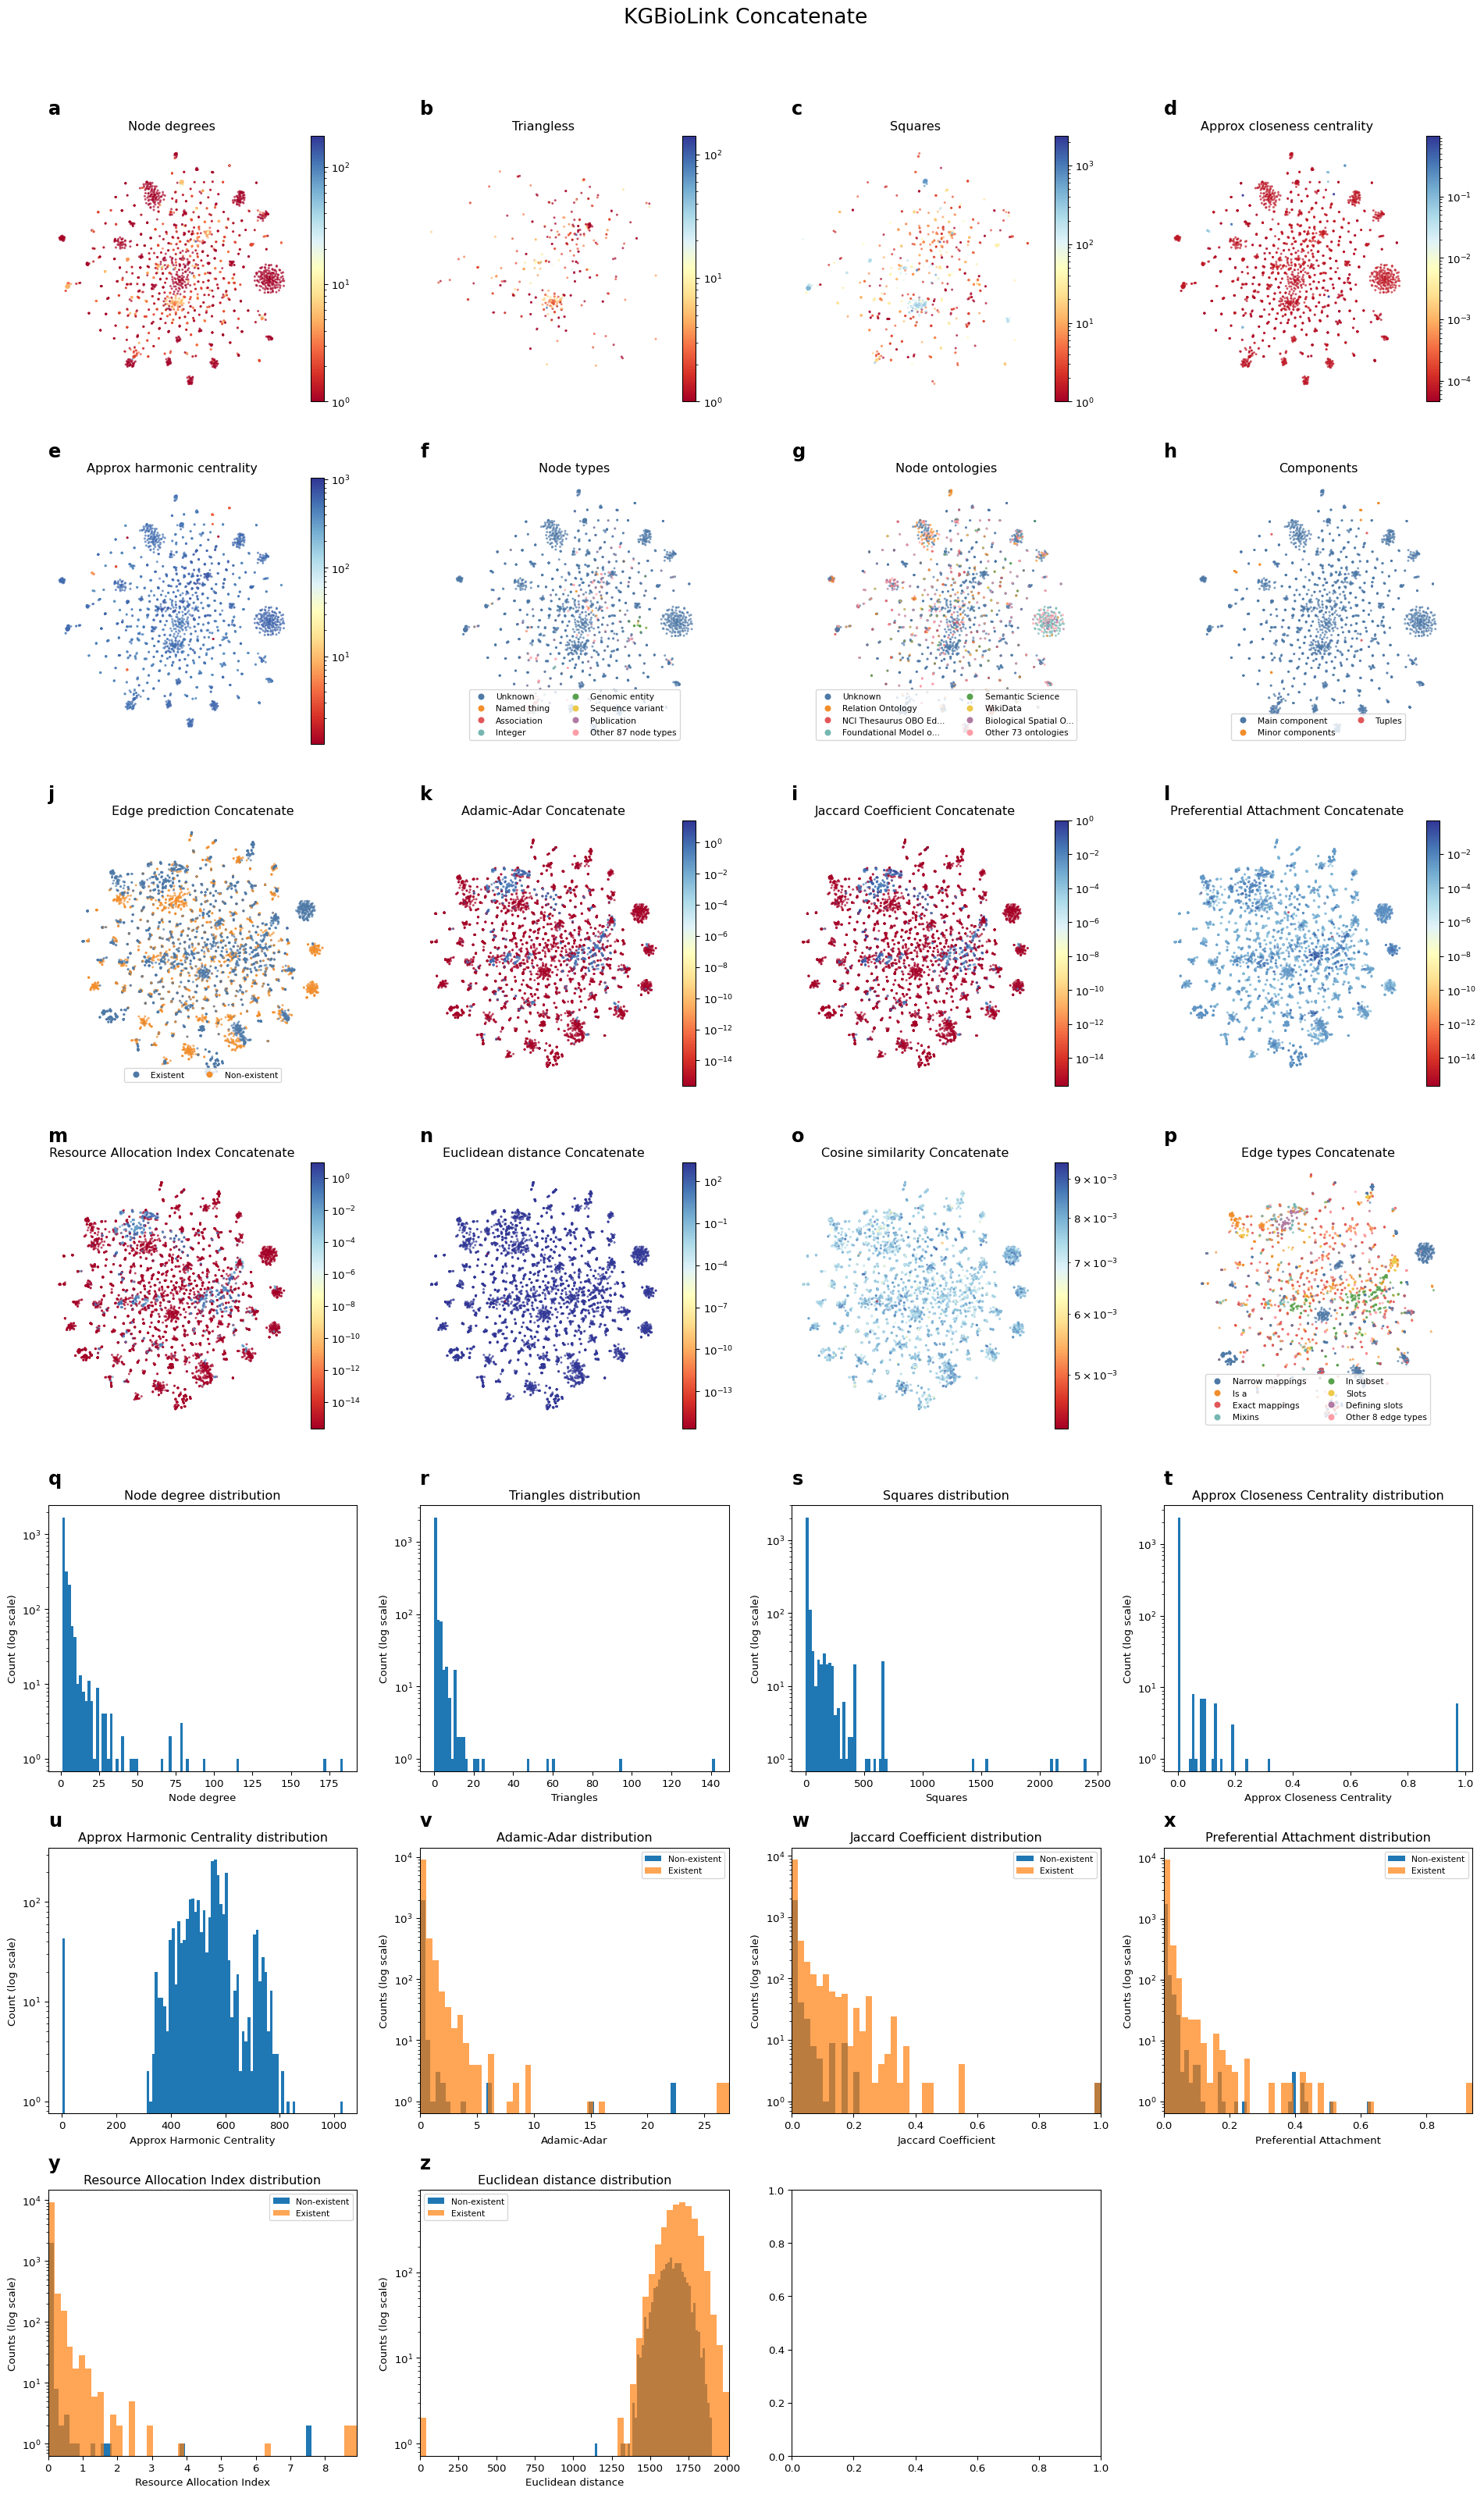

In [8]:
GraphVisualizer(kg.to_undirected()).fit_and_plot_all("RUINE")

In [9]:
embedding = DeepWalkSkipGramEnsmallen(
    embedding_size=200,
    epochs=500
).fit_transform(kg.to_undirected())

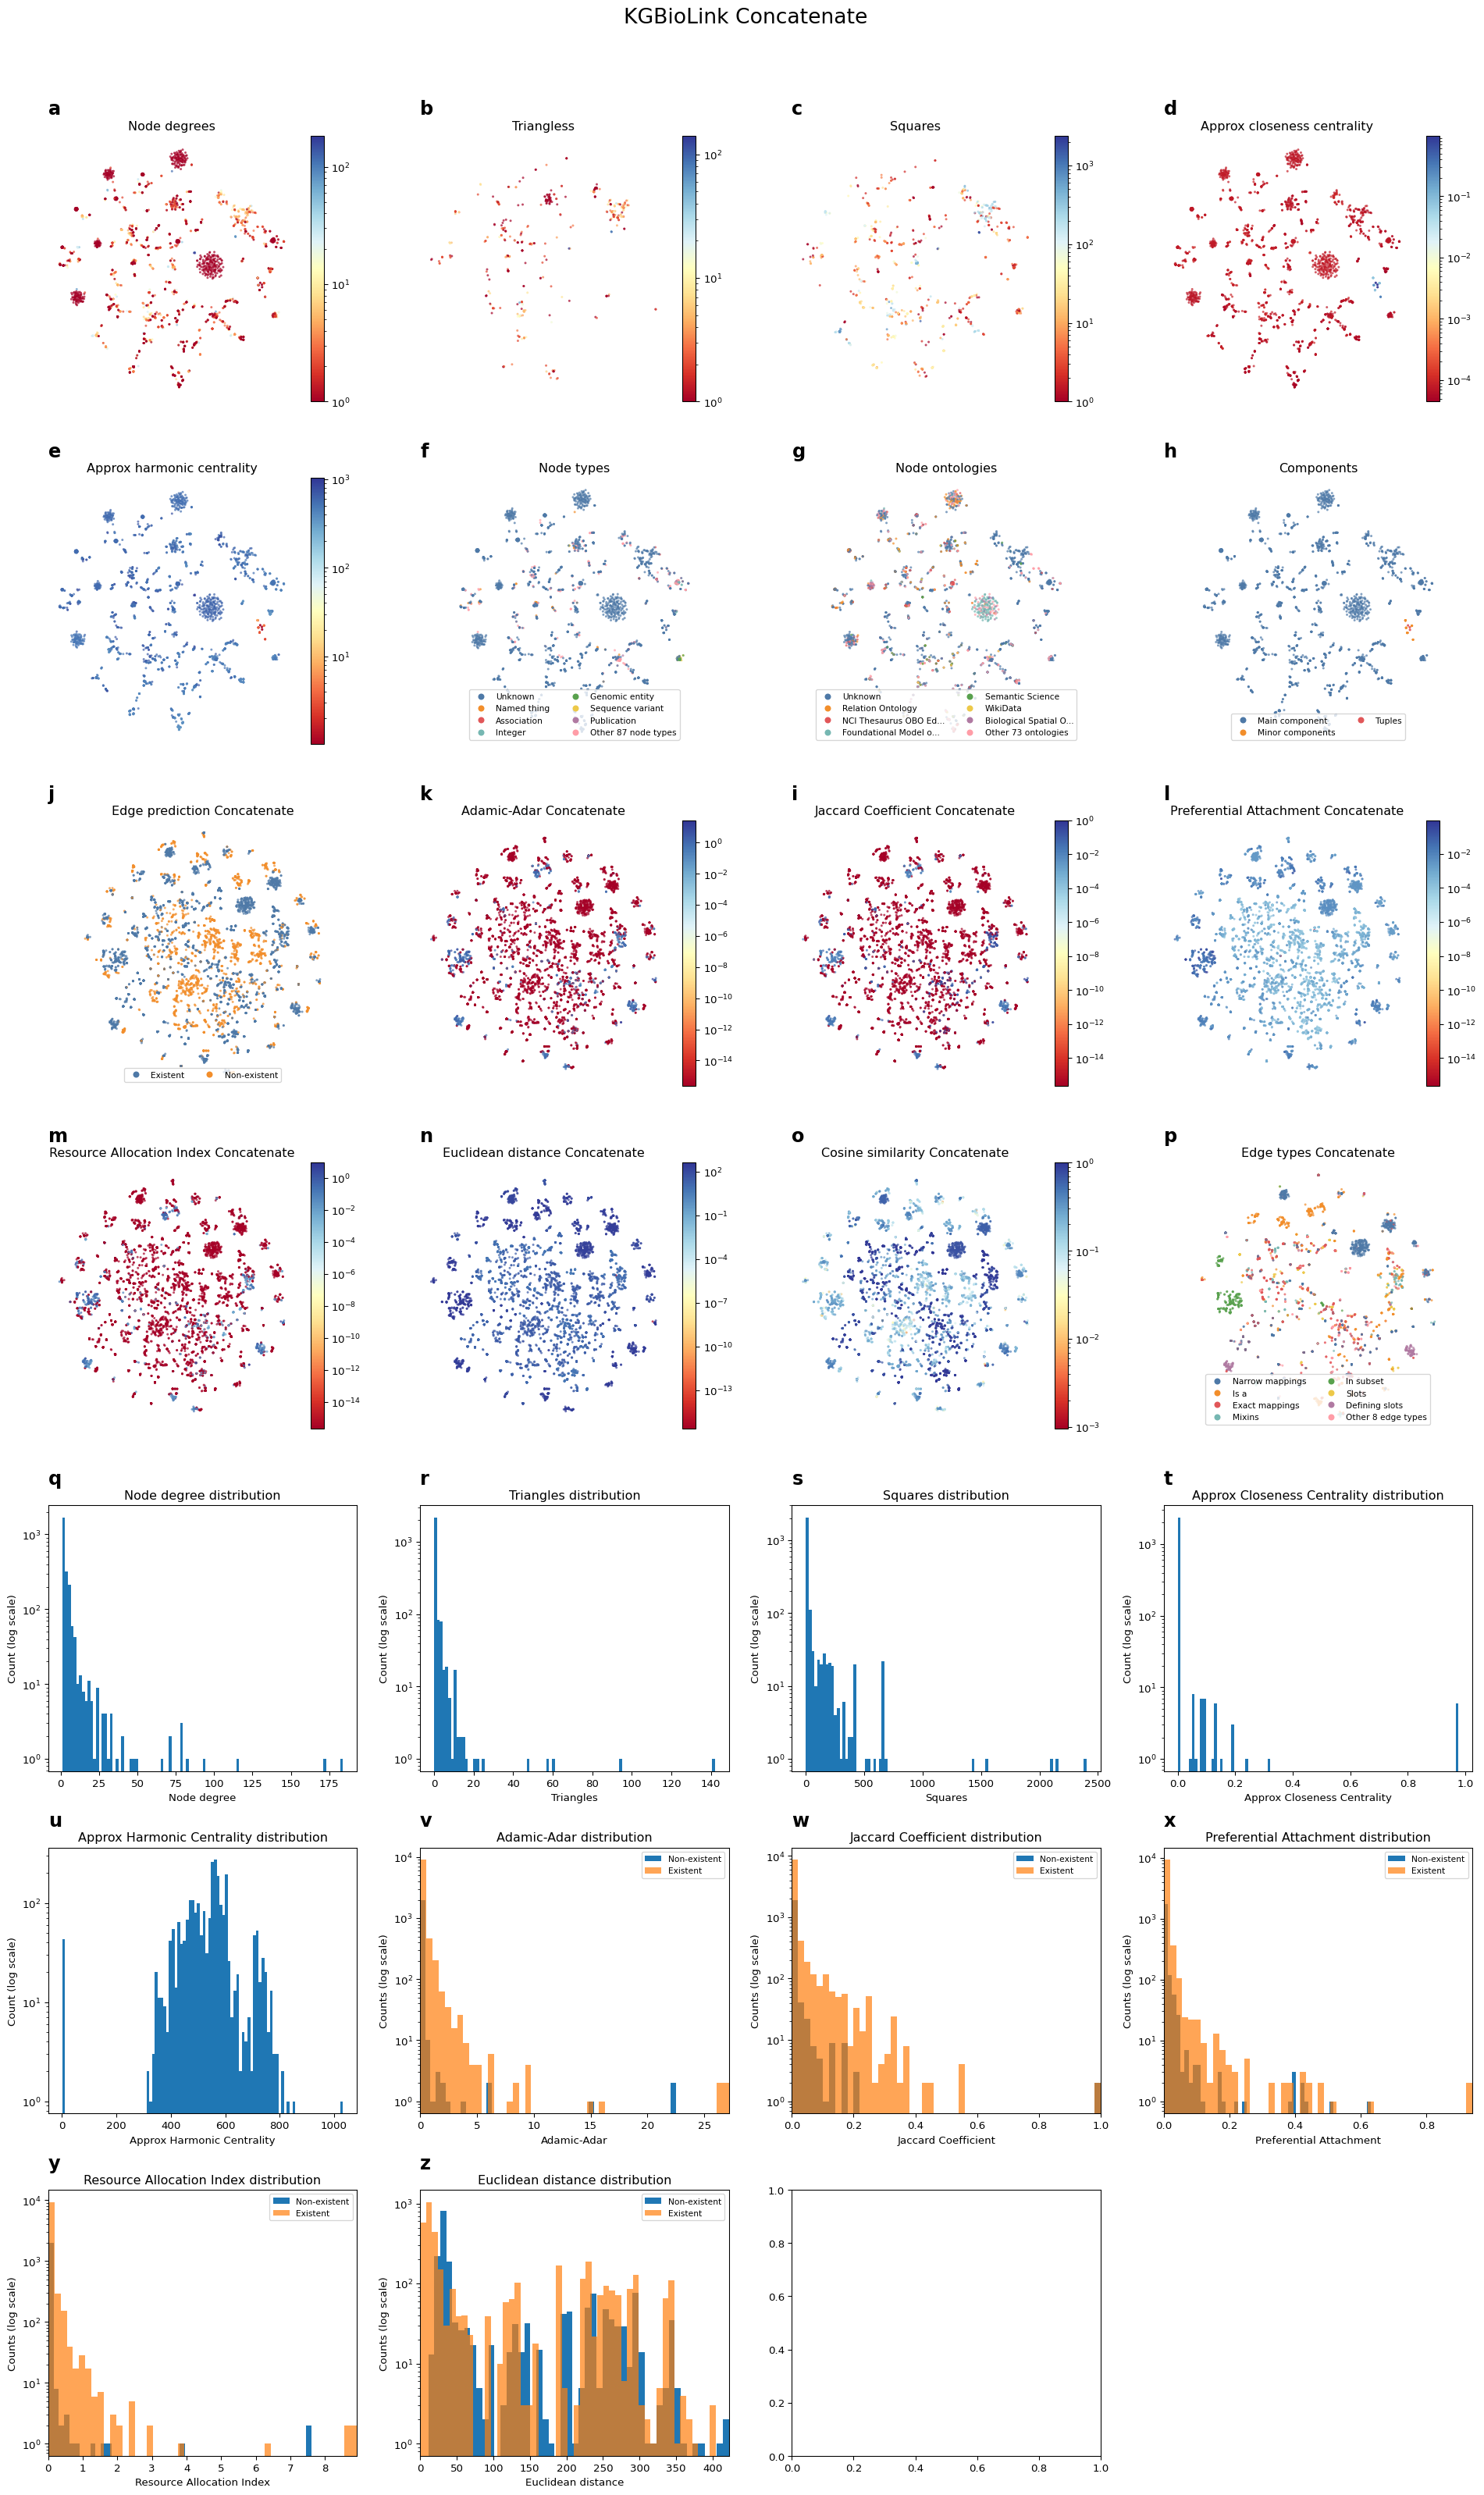

In [10]:
GraphVisualizer(kg).fit_and_plot_all(embedding)

In [11]:
center, context = embedding.get_all_node_embedding()

In [12]:
center.to_csv(f"kg_biolink_center_{version}.csv.gz")
context.to_csv(f"kg_biolink_context_{version}.csv.gz")